In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns




In [4]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CtrlvTrt\\Para_Scores_Summary.xlsx', sheet_name = "Sheet1")
df.head()

,Label,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 3 (47.33%)
0,20250616,Ctrl,20mins,Para,1,0616-Ctrl-20mins-Para,20mins,0.312112
1,20250616,Ctrl,20mins,Para,2,0616-Ctrl-20mins-Para,20mins,0.367634
2,20250616,Ctrl,20mins,Para,3,0616-Ctrl-20mins-Para,20mins,0.448281
3,20250616,Ctrl,20mins,Para,4,0616-Ctrl-20mins-Para,20mins,0.431457
4,20250616,Ctrl,20mins,Para,6,0616-Ctrl-20mins-Para,20mins,0.540792


In [5]:

data = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 3 (47.33%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 3 (47.33%)'],
                            groups=dff['sample'],
                            alpha=0.05)
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

0.16718482921511285
0.022668407571083096
0.06938766528552114
0.8440693032196259
0.000651882462161104


In [6]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

,group1,group2,meandiff,p-adj,lower,upper,reject,sig
0,Ctrl,Trt,0.1812,0.0000,0.1051,0.2573,True,**
1,Ctrl,Trt_24h,0.1196,0.0009,0.0435,0.1957,True,**
2,Trt,Trt_24h,-0.0616,0.1361,-0.1377,0.0145,False,ns
3,Ctrl,Trt,0.1396,0.0005,0.0543,0.2250,True,**
4,Ctrl,Trt_24h,0.1225,0.0019,0.0397,0.2052,True,**
5,Trt,Trt_24h,-0.0172,0.8779,-0.1013,0.0669,False,ns
6,Ctrl,Trt,0.1555,0.0000,0.0887,0.2224,True,**
7,Ctrl,Trt_24h,0.1454,0.0000,0.0823,0.2084,True,**
8,Trt,Trt_24h,-0.0102,0.9248,-0.0743,0.0540,False,ns
9,Ctrl,Trt,0.1224,0.0000,0.0621,0.1827,True,**


In [14]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

<module 'matplotlib.pyplot' from 'c:\\Users\\oadeji01\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

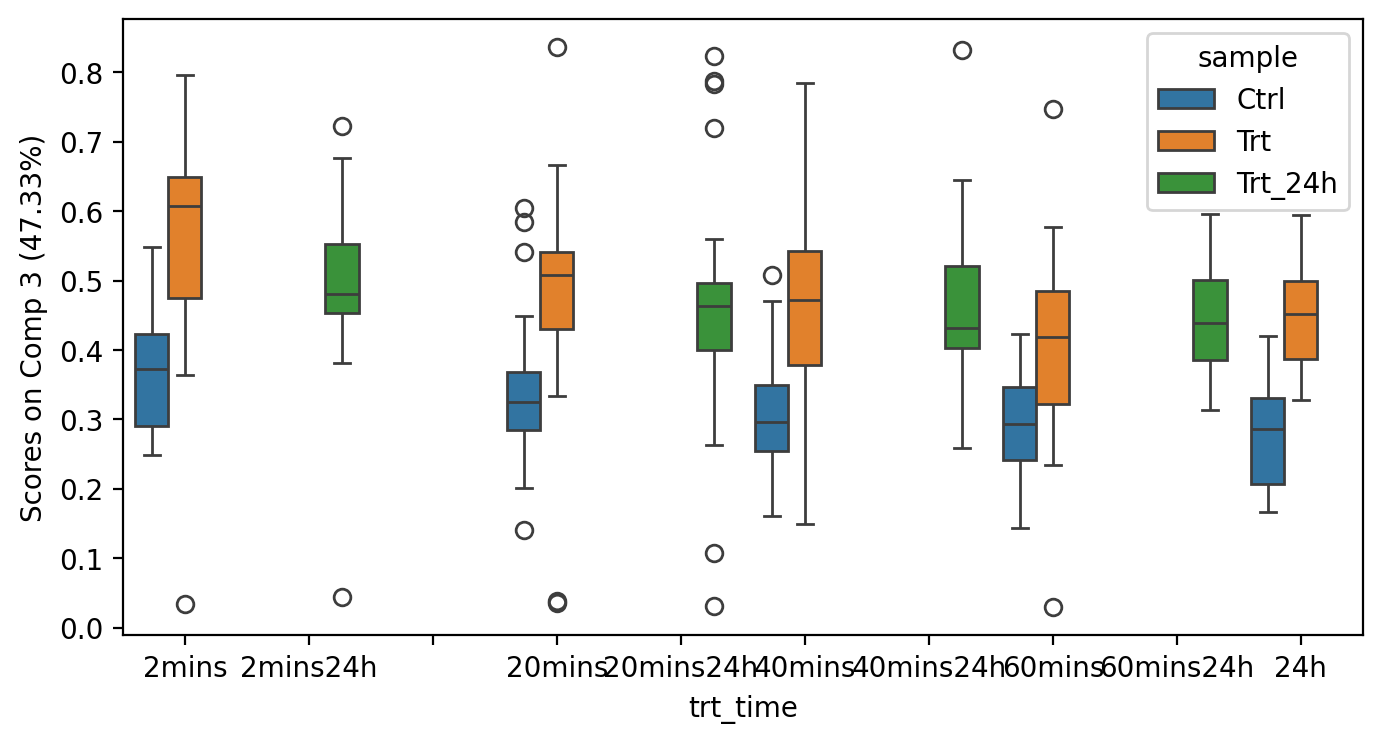

In [7]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 3 (47.33%)',
    data = df,
    hue = 'sample',
    order = ['2mins', '2mins24h', ' ', '20mins', '20mins24h', ' ', '40mins', '40mins24h', ' ', '60mins', 
       '60mins24h',' ', '24h']
)
plt